# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Viddy Virstandi Paramanayaka Andanawari Purnama
- **Email:** viddyvirstandi28@gmail.com
- **ID Dicoding:** MC154D5Y1022

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dalam beberapa bulan terakhir ?
- Bagaimana pola rata-rata waktu pengiriman berdasarkan lokasi pelanggan ?
- Kategori produk apa yang paling banyak dibeli oleh pelanggan ?
- Metode pembayaran apa yang paling sering digunakan oleh pelanggan ?
- Bagaimana distribusi harga pesanan dalam dataset ini ?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data

#### orders_dataset

In [6]:
#membaca csv
dataset_order = pd.read_csv("/content/dataset/orders_dataset.csv")

# Display the first few rows
dataset_order.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00


#### customers_dataset

In [ ]:
#membaca csv dalam folder
dataset_customers = pd.read_csv("/content/dataset/customers_dataset.csv")

# Display the first few rows
dataset_customers.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP


#### order_items_dataset

In [10]:
#membaca csv dalam folder
dataset_order_items = pd.read_csv("/content/dataset/order_items_dataset.csv")

# Display the first few rows
dataset_order_items.head(4)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79


#### products_dataset

In [13]:
#membaca csv dalam folder
dataset_products = pd.read_csv("/content/dataset/products_dataset.csv")

# Display the first few rows
dataset_products.head(4)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0


#### order_payment_dataset

In [17]:
#membaca csv dalam folder
dataset_order_payments = pd.read_csv("/content/dataset/order_payments_dataset.csv")

# Display the first few rows
dataset_order_payments.head(4)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78


In [ ]:
print("insight yang diperoleh :")
print(f"dataset order memiliki jumlah baris {dataset_order.shape} kolom")
print(f"dataset customer memiliki jumlah baris {dataset_customers.shape} kolom")
print(f"dataset order item memiliki jumlah baris {dataset_order_items.shape} kolom")
print(f"dataset products memiliki jumlah baris {dataset_products.shape} kolom")
print(f"dataset order payments memiliki jumlah baris {dataset_order_payments.shape} kolom")

insight yang diperoleh :
dataset order memiliki jumlah baris (99441, 8) kolom
dataset customer memiliki jumlah baris (99441, 5) kolom
dataset order item memiliki jumlah baris (112650, 7) kolom
dataset products memiliki jumlah baris (32951, 9) kolom
dataset order payments memiliki jumlah baris (103886, 5) kolom


### Assessing Data

#### order_dataset

In [ ]:
dataset_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 8.6+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_order.duplicated().sum())

In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_order.isnull().sum()})

**Insight:**
- terdapat 160 data kosong pada kolom order_approved_at
- terdapat 1783 data kosong pada kolom order_delivered_carrier_date
- terdapat 2965 data kosong pada kolom order_delivered_customer_date

#### customers_dataset

In [ ]:
dataset_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_customers.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_order.isnull().sum()})

**Insight:**
- terdapat 0 data kosong


#### order_items_dataset

In [11]:
dataset_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_order_items.duplicated().sum())

In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_order_items.isnull().sum()})

**Insight:**
- terdapat 0 data kosong

#### product_dataset

In [14]:
dataset_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_products.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_products.isnull().sum()})

,Nilai yang Kosong
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Terdapat 610 data kosong pada kolom 'product_category_name' dalam tabel 'products_dataset'.
- Terdapat 610 data kosong pada kolom 'product_name_lenght' dalam tabel 'products_dataset'.
- Terdapat 610 data kosong pada kolom 'product_description_lenght' dalam tabel 'products_dataset'.
- Terdapat 610 data kosong pada kolom 'product_photos_qty' dalam tabel 'products_dataset'.
- Terdapat 2 data kosong pada kolom 'product_weight_g' dalam tabel 'products_dataset'.
- Terdapat 2 data kosong pada kolom 'product_length_cm' dalam tabel 'products_dataset'.
- Terdapat 2 data kosong pada kolom 'product_height_cm' dalam tabel 'products_dataset'.
- Terdapat 2 data kosong pada kolom 'product_width_cm' dalam tabel 'products_dataset

#### order_payment_dataset

In [18]:
dataset_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_order_payments.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_order_payments.isnull().sum()})

,Nilai yang Kosong
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


**Insight:**
- terdapat 0 data kosong

### Cleaning Data

#### membersihkan data kosong pada order_dataset

In [ ]:
dataset_order.dropna(inplace=True)

#menamppilkan kembali tabel setelah dibersihkan
pd.DataFrame({'Nilai yang Kosong':dataset_order.isnull().sum()})

,Nilai yang Kosong
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Membersihkan data kosong pada product_dataset

In [ ]:
dataset_order.dropna(inplace=True)

#menamppilkan kembali tabel setelah dibersihkan
pd.DataFrame({'Nilai yang Kosong':dataset_order.isnull().sum()})

## Visualization & Explanatory Analysis

In [ ]:
Bagaimana tren jumlah pesanan dalam beberapa bulan terakhir ?
Bagaimana pola rata-rata waktu pengiriman berdasarkan lokasi pelanggan ?
Kategori produk apa yang paling banyak dibeli oleh pelanggan ?
Metode pembayaran apa yang paling sering digunakan oleh pelanggan ?
Bagaimana distribusi harga pesanan dalam dataset ini ?

### Pertanyaan 1 : Bagaimana tren jumlah pesanan dalam beberapa bulan terakhir ?

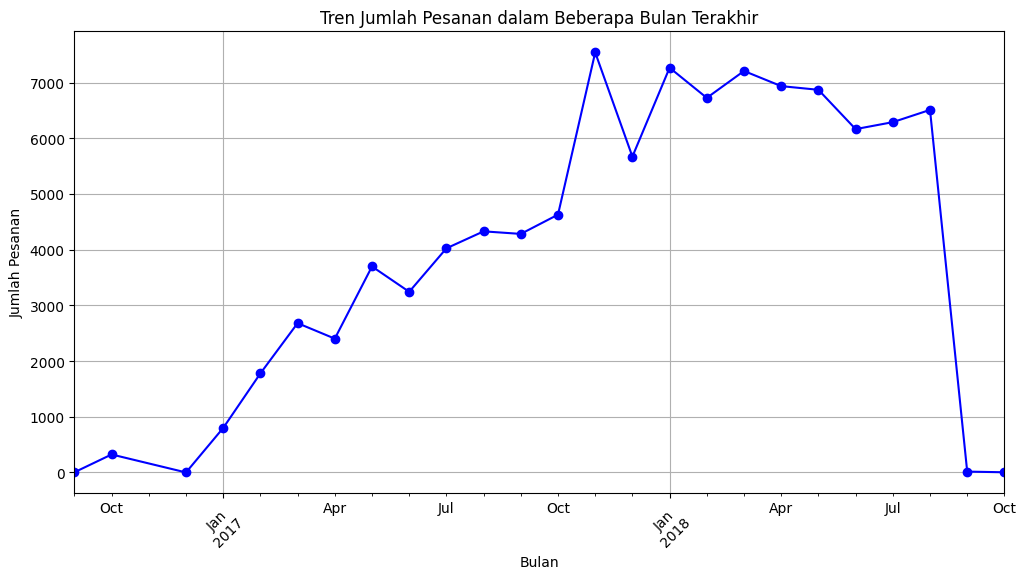

In [7]:
# Konversi tanggal ke format datetime
dataset_order['order_purchase_timestamp'] = pd.to_datetime(dataset_order['order_purchase_timestamp'])

# Kelompokkan berdasarkan bulan
dataset_order['year_month'] = dataset_order['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = dataset_order.groupby('year_month').size()

# Visualisasi
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', color='b')
plt.title('Tren Jumlah Pesanan dalam Beberapa Bulan Terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**insight:**

Berdasarkan grafik di atas, kita dapat menyimpulkan bahwa tren jumlah pesanan naik secara konsisten dari Bulan Desember 2016 hingga Maret 2017. Selain itu, kita juga dapat melihat adanya peningkatan jumlah pesanan yang cukup signifikan pada bulan November.

### Pertanyaan 2 : Bagaimana pola rata-rata waktu pengiriman berdasarkan lokasi pelanggan ?

<ipython-input-62-ca508192b9ab>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette='coolwarm')


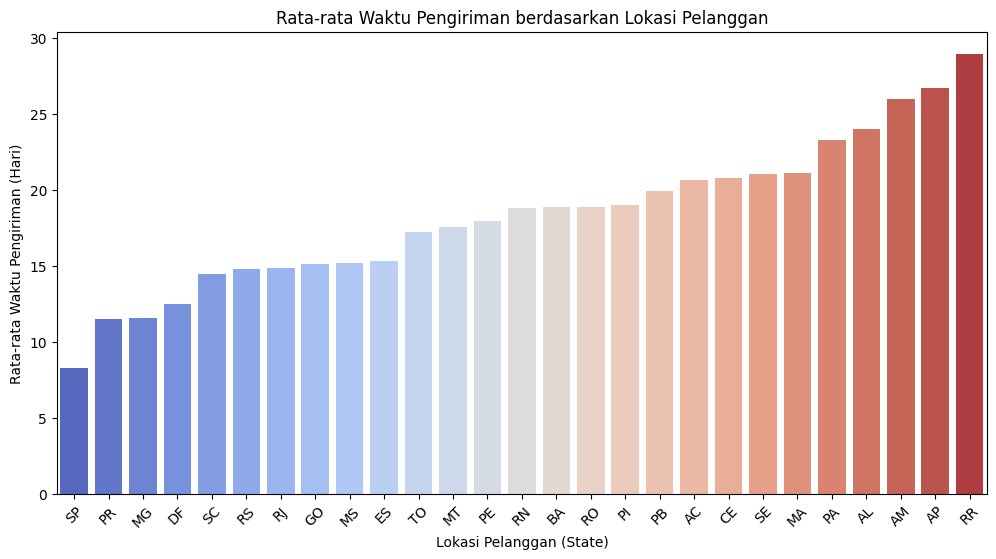

In [ ]:
# Konversi tanggal ke format datetime
dataset_order['order_delivered_customer_date'] = pd.to_datetime(dataset_order['order_delivered_customer_date'])
dataset_order['order_purchase_timestamp'] = pd.to_datetime(dataset_order['order_purchase_timestamp'])

# Hitung waktu pengiriman
dataset_order['delivery_time'] = (dataset_order['order_delivered_customer_date'] - dataset_order['order_purchase_timestamp']).dt.days

# Gabungkan dengan dataset pelanggan
orders_with_location = dataset_order.merge(dataset_customers, on='customer_id', how='left')

# Hitung rata-rata waktu pengiriman berdasarkan lokasi
avg_delivery_time = orders_with_location.groupby('customer_state')['delivery_time'].mean().sort_values()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette='coolwarm')
plt.title('Rata-rata Waktu Pengiriman berdasarkan Lokasi Pelanggan')
plt.xlabel('Lokasi Pelanggan (State)')
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)')
plt.xticks(rotation=45)
plt.show()


**Insight:**

waktu pengiriman ke Sao Paulo merupakan waktu pengiriman tercepat dibanding state yang lain yaitu selama 8.298 Hari

### Pertanyaan 3 : Kategori produk apa yang paling banyak dibeli oleh pelanggan ?

<ipython-input-16-8d9a6ca15c1b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories['product_category_name_english'], x=top_categories['total_sold'], palette='viridis')


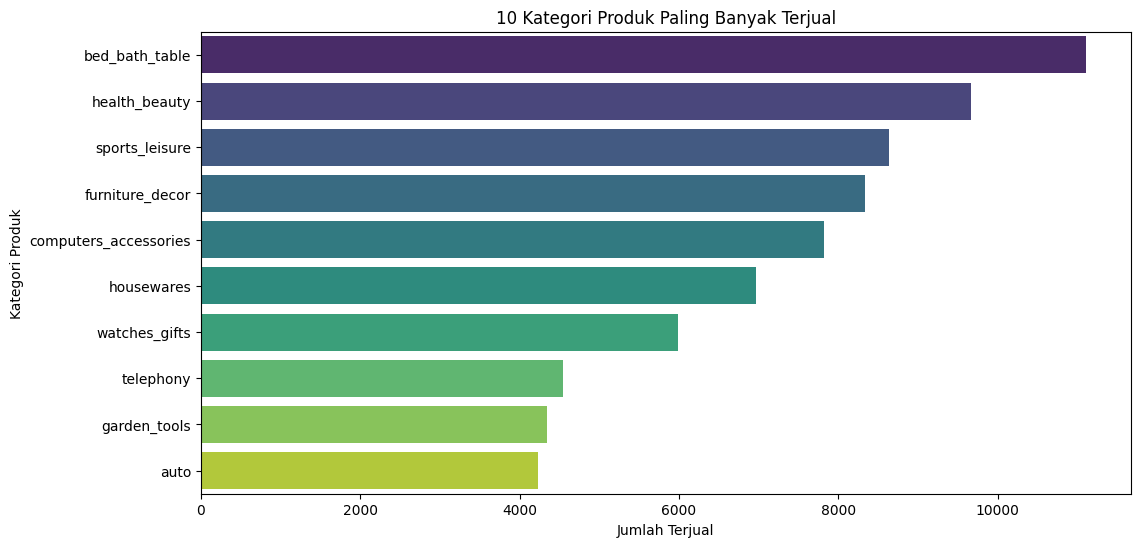

In [16]:
# Membaca dataset product_cataegory_name_translation
product_category_name_translation = pd.read_csv("/content/dataset/product_category_name_translation.csv")

# Menghitung jumlah produk yang terjual berdasarkan product_id
product_sales = dataset_order_items['product_id'].value_counts().reset_index()
product_sales.columns = ['product_id', 'total_sold']

# Gabungkan dengan products_dataset untuk mendapatkan kategori produk
product_sales = product_sales.merge(dataset_products[['product_id', 'product_category_name']], on='product_id', how='left')

# Gabungkan dengan product_category_name_translation untuk mendapatkan nama kategori dalam bahasa Inggris
product_sales = product_sales.merge(product_category_name_translation, on='product_category_name', how='left')

# Mengelompokkan berdasarkan kategori produk
category_sales = product_sales.groupby('product_category_name_english')['total_sold'].sum().reset_index()

# Ambil 10 kategori dengan penjualan terbanyak
top_categories = category_sales.sort_values(by='total_sold', ascending=False).head(10)

# Visualisasi kategori produk yang paling banyak terjual
plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories['product_category_name_english'], x=top_categories['total_sold'], palette='viridis')
plt.title('10 Kategori Produk Paling Banyak Terjual')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.show()

**Insight:**

Berdasarkan visualisasi diatas, bisa dilihat 10 Kategori Barang yang banyak dibeli oleh pelanggan

### Pertanyaan 4 : Metode pembayaran apa yang paling sering digunakan oleh pelanggan ?

<ipython-input-19-9fa94f7a4c06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_methods.index, x=payment_methods.values, palette='pastel')


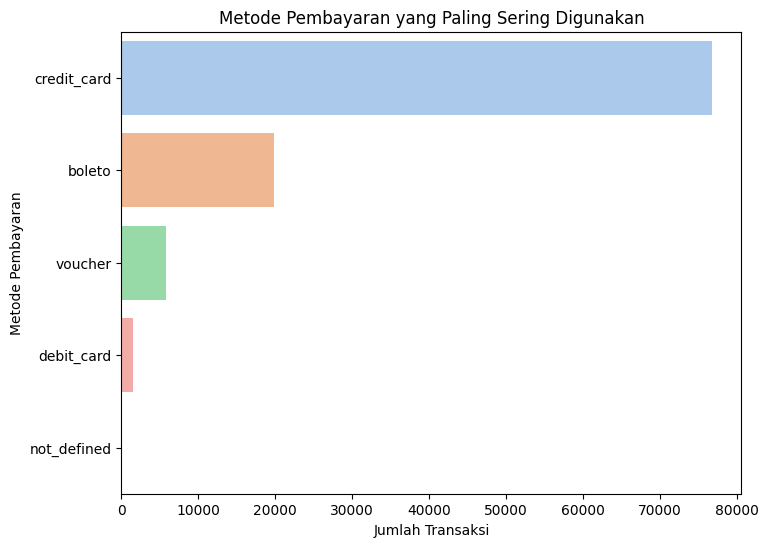

In [19]:
# Hitung jumlah penggunaan setiap metode pembayaran
payment_methods = dataset_order_payments['payment_type'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(y=payment_methods.index, x=payment_methods.values, palette='pastel')
plt.title('Metode Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Metode Pembayaran')
plt.show()


**Insight:**

Berdasarkan visualisasi diatas, kebanyakan pembeli menggunakan metode pembayaran menggunakan kartu kredit

### Pertanyaan 5 : Bagaimana distribusi harga pesanan dalam dataset ini ?

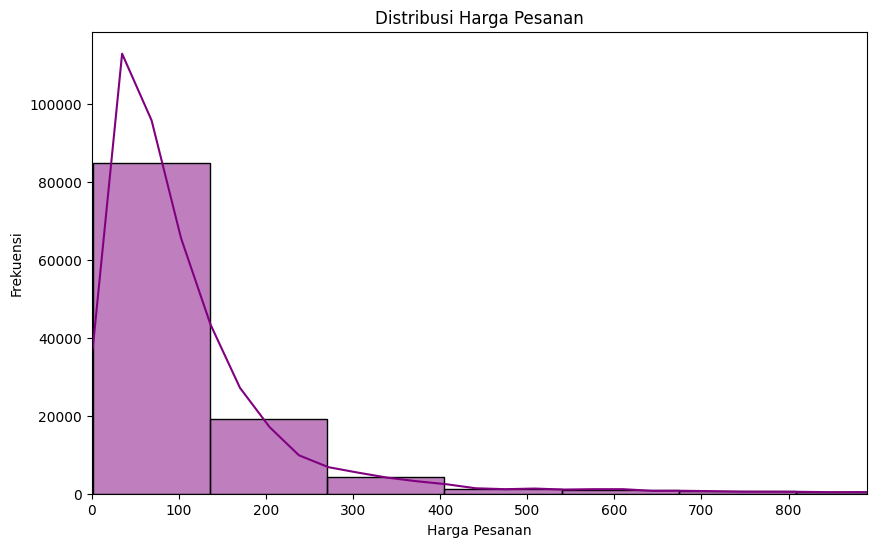

In [20]:
# Ambil harga dari order_items_dataset
plt.figure(figsize=(10, 6))
sns.histplot(dataset_order_items['price'], bins=50, kde=True, color='purple')
plt.title('Distribusi Harga Pesanan')
plt.xlabel('Harga Pesanan')
plt.ylabel('Frekuensi')
plt.xlim(0, dataset_order_items['price'].quantile(0.99))
plt.show()


**Insight:**

Kita dapat melihat bahwa sebagian besar pesanan memiliki harga yang lebih rendah, terlihat dari puncak distribusi yang cenderung ke kiri

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan grafik di atas, kita dapat menyimpulkan bahwa tren jumlah pesanan naik secara konsisten dari Bulan Desember 2016 hingga Maret 2017. Selain itu, kita juga dapat melihat adanya peningkatan jumlah pesanan yang cukup signifikan pada bulan November.

- Conclution pertanyaan 2 : waktu pengiriman ke Sao Paulo merupakan waktu pengiriman tercepat dibanding state yang lain yaitu selama 8.298 Hari

- Conclution pertanyaan 3 : Berdasarkan visualisasi diatas, bisa dilihat 10 Kategori Barang yang banyak dibeli oleh pelanggan

- Conclution pertanyaan 4 : Berdasarkan visualisasi diatas, kebanyakan pembeli menggunakan metode pembayaran menggunakan kartu kredit

- Conclution pertanyaan 5 : Kita dapat melihat bahwa sebagian besar pesanan memiliki harga yang lebih rendah, terlihat dari puncak distribusi yang cenderung ke kiri